In [3]:
# Importar librerias standard de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import *

import numpy as np

service = QiskitRuntimeService(channel="local")

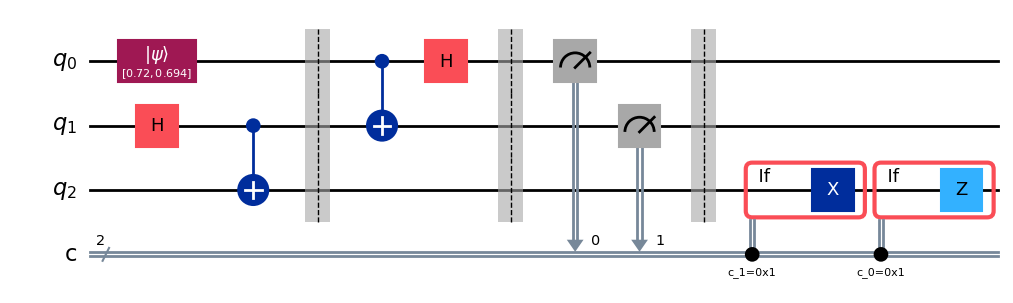

In [13]:
circuit = QuantumCircuit(3, 2)

alpha = np.random.random()
beta = np.sqrt(1 - alpha**2)
circuit.initialize([alpha, beta], 0) #Qubit a teletransportar con alpha y beta random

circuit.h(1)
circuit.cx(1, 2) #Creamos el entrelazamiento cuántico entre los qubits 1 y 2.

circuit.barrier()

circuit.cx(0, 1)
circuit.h(0)

circuit.barrier()

circuit.measure(0, 0)
circuit.measure(1, 1)

circuit.barrier()

with circuit.if_test((1, 1)):
    circuit.x(2)
with circuit.if_test((0, 1)):
    circuit.z(2)

circuit.draw(output="mpl")

In [14]:
backend = Aer.get_backend('statevector_simulator')

job = backend.run(circuit)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=6)

display(array_to_latex(outputstate))

<IPython.core.display.Latex object>